rbf


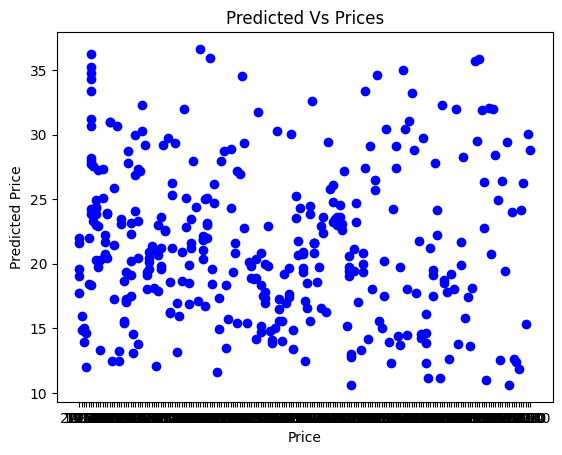

R^2 0.6654081224638861
Adjusted R^2 0.6526149036169171
MAE 3.0868376328716907
MSE 29.767357350947485
RMSE 5.455946971053465


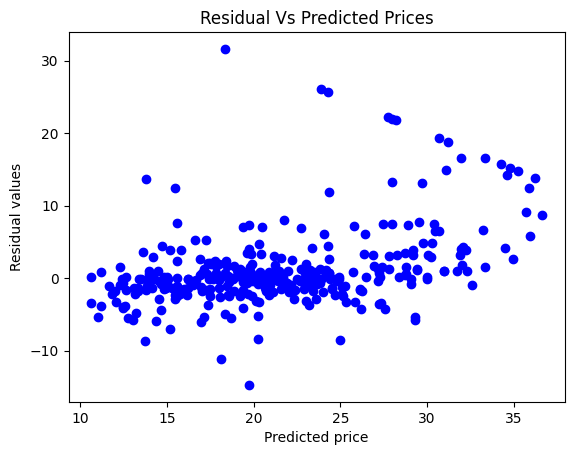

R^2 0.6721800200126051
Adjusted R^2 0.641298427694952
MAE 2.8904025765448385
MSE 24.193116651402363
RMSE 4.918649880953346
sigmoid


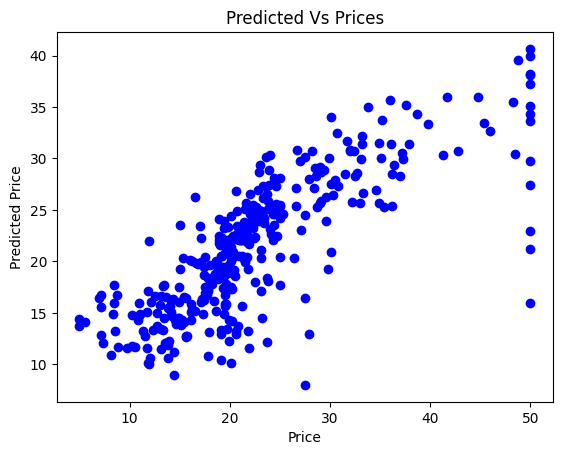

R^2 0.6107044871085963
Adjusted R^2 0.5958196586745131
MAE 3.9148857386490437
MSE 34.63413019076658
RMSE 5.8850769061046755


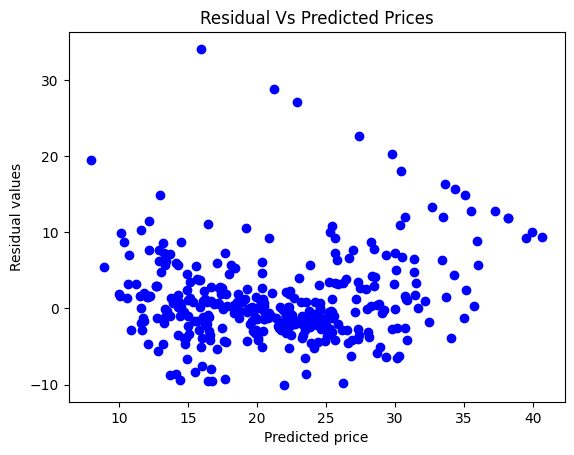

R^2 0.4875652306495546
Adjusted R^2 0.4392923900585707
MAE 3.780361537218622
MSE 37.81768930498528
RMSE 6.149608874146817
linear


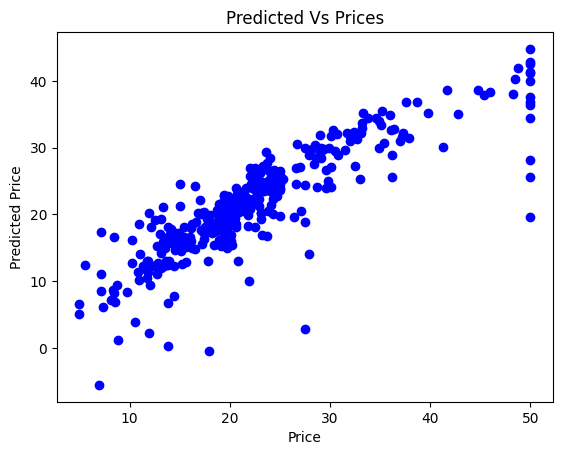

R^2 0.731986021064563
Adjusted R^2 0.7217384277523258
MAE 3.03766010669011
MSE 23.844176806591353
RMSE 4.883049949221424


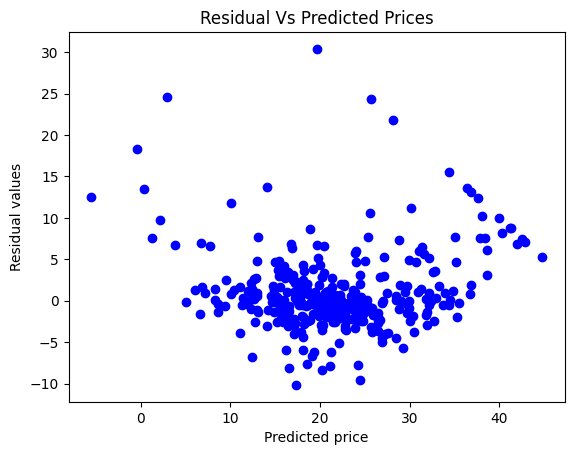

R^2 0.5397586553014456
Adjusted R^2 0.49640258659795866
MAE 3.4152194488010843
MSE 33.96581422681606
RMSE 5.828019751752396
poly


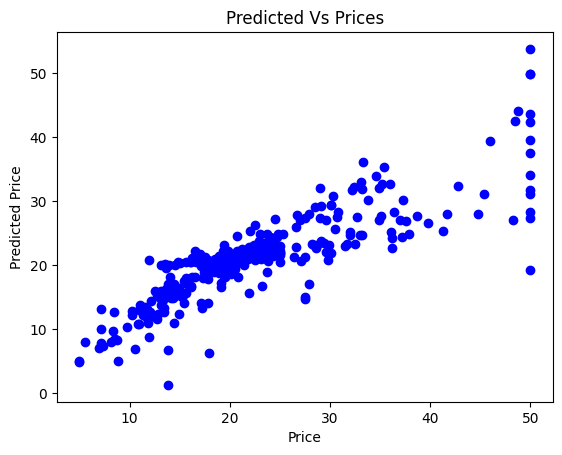

R^2 0.6922836743996472
Adjusted R^2 0.6805180501855161
MAE 3.160629996204146
MSE 27.376342469274505
RMSE 5.232240673867603


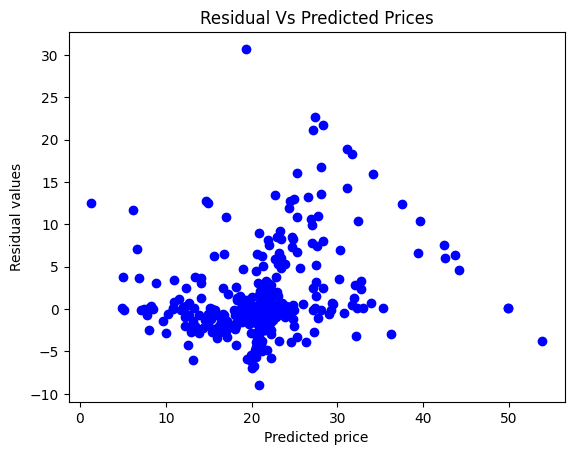

R^2 0.44285462155463784
Adjusted R^2 0.3903699119909443
MAE 3.6346594279139683
MSE 41.1173325464685
RMSE 6.412279824404773


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']

data = []
with open ('./housing.csv', 'r') as raw:
    for i, line in enumerate(raw):
        modified_line = line.split()
        data.append(modified_line)
        
df = pd.DataFrame(data, columns=column_names)
yy = df['Price']
XX = df.drop(['Price'], axis=1)

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=7)

sc = StandardScaler()
XX_train = sc.fit_transform(XX_train)
XX_test = sc.fit_transform(XX_test)

kernels = ["rbf", "sigmoid", "linear", "poly"]
# Step 7: Train the SVM model
for kernel_c in kernels:
    print(kernel_c)
    regg = svm.SVR(kernel=kernel_c)
    regg.fit(XX_train, yy_train)

    y_pred = regg.predict(XX_train)
    y_test_pred = pd.Series(y_pred)
    plt.scatter(yy_train, y_pred, color='blue')
    plt.xlabel("Price")
    plt.ylabel("Predicted Price")
    plt.title("Predicted Vs Prices")
    plt.show()

    print("R^2", metrics.r2_score(yy_train, y_pred))
    print("Adjusted R^2", 1 - (1 - metrics.r2_score(yy_train, y_pred)) * (len(yy_train) - 1) / (len(yy_train) - XX_train.shape[1] - 1))
    print("MAE", metrics.mean_absolute_error(yy_train, y_pred))
    print("MSE", metrics.mean_squared_error(yy_train, y_pred))
    print("RMSE", np.sqrt(metrics.mean_squared_error(yy_train, y_pred)))
    if type(yy_train) != list:
        yy_train = yy_train.to_list()
    yy_pred = []
    for item in y_pred:
        yy_pred.append(float(item))
    for i in range(len(yy_train)):
        yy_train[i] = float(yy_train[i])

    y_residual = []
    for i in range(len(y_pred)):
        y_residual.append( yy_train[i] - yy_pred[i])

    
    plt.scatter(y_pred, yy_train - y_pred, color='blue')
    plt.xlabel("Predicted price")
    plt.ylabel("Residual values")
    plt.title("Residual Vs Predicted Prices")
    plt.show()

    y_test_pred = regg.predict(XX_test)


    svm_acc = metrics.r2_score(yy_test, y_test_pred)
    print("R^2", svm_acc)
    print("Adjusted R^2", 1 - (1 - metrics.r2_score(yy_test, y_test_pred)) * (len(yy_test) - 1) / (len(yy_test) - XX_test.shape[1] - 1))
    print("MAE", metrics.mean_absolute_error(yy_test, y_test_pred))
    print("MSE", metrics.mean_squared_error(yy_test, y_test_pred))
    print("RMSE", np.sqrt(metrics.mean_squared_error(yy_test, y_test_pred)))